# This notebook was used to identify the mean and standard deviation for the training dataset.

In [1]:
import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
import torchvision.utils as utils

import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_to_data = 'data/'
path_train = path_to_data + 'train'

In [14]:
size = (224, 224)

# Transforms for train set
train_transform = v2.Compose([
    v2.RandomResizedCrop(size=size, antialias=True),
    # v2.Resize(size=size),
    v2.RandomHorizontalFlip(p=0.5),
    # v2.RandomVerticalFlip(p=0.5),
    v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    # v2.ElasticTransform(),
    # v2.RandomRotation(degrees=(30, 70)),
    v2.ToTensor(),
    # v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.1977, 0.1977, 0.1977], std=[0.1048, 0.1048, 0.1048]),
])

/root/miniconda3/envs/uECE189A/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [15]:
dataset_train = ImageFolder(root=path_train, transform=train_transform)

In [16]:
# Batch Size
batch_size = 32

# Number of workers
num_workers = 4

In [17]:
#Initialize dataloader for train set
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size, shuffle=True, 
                                             pin_memory = True,
                                             num_workers=num_workers,
                                             persistent_workers=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 224, 224]) torch.Size([32])
1 torch.Size([32, 3, 224, 224]) torch.Size([32])
2 torch.Size([32, 3, 224, 224]) torch.Size([32])
3 torch.Size([32, 3, 224, 224]) torch.Size([32])
0 3 2 3 3 2 0 2 3 0 1 1 0 1 3 0 3 2 0 1 3 3 2 1 2 3 3 0 3 2 0 1


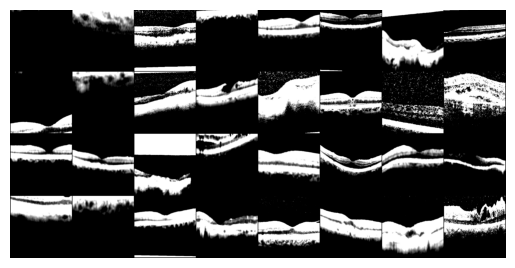

In [18]:
# Helper function to show a batch
def show_batch(sample_batched):
    images_batch, labels_batch = \
            sample_batched[0], sample_batched[1]

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    print(' '.join('%d' % labels_batch[j] for j in range(batch_size)))

for i_batch, sample_batched in enumerate(train_loader):
    print(i_batch, sample_batched[0].size(),
          sample_batched[1].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()

        
        break

In [19]:
images_batch, labels_batch = \
            sample_batched[0], sample_batched[1]

Source: https://discuss.pytorch.org/t/computing-the-mean-and-std-of-dataset/34949/4

In [20]:
mean = 0.0
for images, _ in train_loader:
    batch_samples = images.size(0) 
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
mean = mean / len(train_loader.dataset)

var = 0.0
pixel_count = 0
for images, _ in train_loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    var += ((images - mean.unsqueeze(1))**2).sum([0,2])
    pixel_count += images.nelement()
std = torch.sqrt(var / pixel_count)

In [21]:
# Post Normalization
print(mean)
print(std)

tensor([-0.0008, -0.0008, -0.0008])
tensor([0.9994, 0.9994, 0.9994])


In [13]:
# Pre Normalization
print(mean)
print(std)

tensor([0.1977, 0.1977, 0.1977])
tensor([0.1048, 0.1048, 0.1048])
